In [3]:
import stereo as st
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import pyarrow.feather as feather
import os
from stereo.core.stereo_exp_data import AnnBasedStereoExpData
import scanpy as sc
import numpy as np
import pandas as pd

In [7]:
# B01806B6 as an example
data_path = "../B01806B6/GeneExpMatrix/B01806B6.tissue.gef"
st.io.read_gef_info(data_path)
data1 = st.io.read_gef(file_path=data_path, bin_size = 110)

[2023-08-06 14:49:51][Stereo][27043][MainThread][47740002467520][reader][1124][INFO]: This is GEF file which contains traditional bin infomation.
[2023-08-06 14:49:51][Stereo][27043][MainThread][47740002467520][reader][1125][INFO]: bin_type: bins
[2023-08-06 14:49:51][Stereo][27043][MainThread][47740002467520][reader][1128][INFO]: Bin size list: ['bin1']
[2023-08-06 14:49:51][Stereo][27043][MainThread][47740002467520][reader][1134][INFO]: Resolution: 500
[2023-08-06 14:49:51][Stereo][27043][MainThread][47740002467520][reader][1137][INFO]: Gene count: 43983
[2023-08-06 14:49:51][Stereo][27043][MainThread][47740002467520][reader][1146][INFO]: offsetX: 0
[2023-08-06 14:49:51][Stereo][27043][MainThread][47740002467520][reader][1149][INFO]: offsetY: 0
[2023-08-06 14:49:51][Stereo][27043][MainThread][47740002467520][reader][1152][INFO]: Width: 26452
[2023-08-06 14:49:51][Stereo][27043][MainThread][47740002467520][reader][1155][INFO]: Height: 24139
[2023-08-06 14:49:51][Stereo][27043][MainThr

In [70]:
if "temp_result" not in os.listdir("../"):
    os.mkdir("../temp_result")

exp_matrix = data1.to_df().T
feather.write_feather(exp_matrix,"../temp_result/exp_matrix.csv")

19it [30:04, 94.97s/it]


In [ ]:
# run the SingleR script

In [8]:
# import the SingleR result as the label
label = pd.read_csv("../temp_result/annotation_result.csv")
label = label[["Unnamed: 0", "X2"]]
label.columns = ["bins", "group"]
data1.tl.result["SingleR"] = label

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

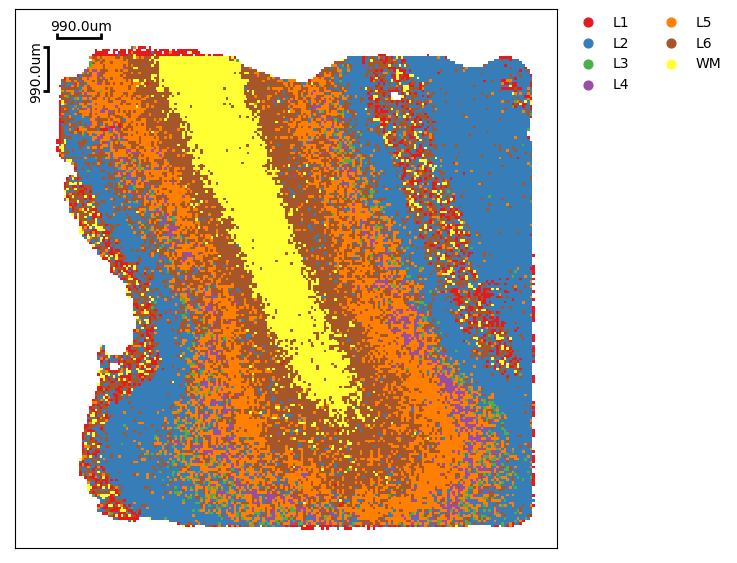

In [9]:
data1.plt.cluster_scatter(res_key = "SingleR")